# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Вывод**

- в education прыгает регистр;
- в days_employed много отрицательных значений, так же есть очень большие значения, вероятнее всего в часах, а не днях;
- в children нашелся -1 ребенок);
- в days_employed и total_income одинаковое кол-во пропусков, либо клиенты никогда не работали, либо пропуски данных;
- в dob_years минимальное значение 0


## Шаг 2. Предобработка данных

### Обработка пропусков

In [5]:
# посмотрим кол-во пропусков 
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Заполним пропуски медианой.

In [6]:
data.loc[data['days_employed'].isna(), 'days_employed'] = data['days_employed'].median()

In [7]:
data.loc[data['total_income'].isna(), 'total_income'] = data['total_income'].median()

In [8]:
# проверим кол-во пропусков 
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Пропуски были в 2х столбцах,показывающих стаж и заработок. Можно было бы предположить, что эти люди не работали совсем, но тогда логичнее было бы при сборе данных указывать 0. Скорее всего здесь произошли ошибки при выгрузке данных.

### Замена типа данных

Приведем стаж из вещественного к целочисленному значению. 
Для начала уберем отрицательные значения.

In [9]:
data['days_employed'] = data['days_employed'].apply(abs)

In [10]:
#проверим 
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

Теперь приводим к целочисленному с помощью astype

In [11]:
data['days_employed'] = data['days_employed'].astype(int)

In [12]:
#проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


In [13]:
#переведем дни в годы,добавим новый столбец
data['years_employed'] = data['days_employed'] / 365

In [14]:
data['years_employed'] = data['years_employed'].astype(int)

In [15]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,932
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,2
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,7
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,0
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,18
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,5


Ого! Кто-то поработал 932 года,очень круто, вероятно данные были в часах. Слишком большие значения нужно будет поделить на 24.

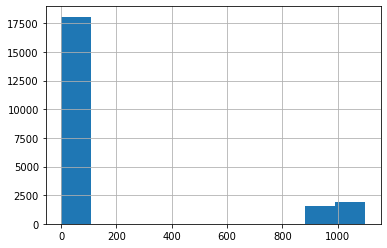

In [16]:
#попробуем найти порог лет, после которого надо делить на 24.
import numpy as np
data['years_employed'].hist()

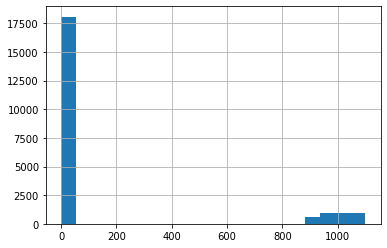

In [17]:
#час от часу не легче! 100 лет. Попробуем сделать больше интервал
data['years_employed'].hist(bins = 20)

In [18]:
#вот, уже лучше, приблизительно 50 лет. Все, что больше 50 лет будем делить на 24.
data.loc[data['years_employed'] > 50, 'years_employed'] = data.loc[data['years_employed'] > 50, 'years_employed'] / 24 

In [19]:
#снова приводим к целоцисленному значению и проверяем,что получилось.
data['years_employed'] = data['years_employed'].astype(int)

In [20]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,38
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,2
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,7
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,0
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,18
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,5


In [21]:
data['years_employed'].describe()

count    21525.000000
mean        11.283066
std         14.186869
min          0.000000
25%          2.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: years_employed, dtype: float64

ОК. Максимально 50 лет, меня это устраивает. Особенно при условии,что мы не рассматриваем как стаж влияет на возврат кредита. 

In [22]:
#теперь приведем к цельночисленгому знгачению доход.
#В какой-бы валюте он не был собран (рубли,доллары, евро....) шестью знаками после запятой можно пренебречь
data['total_income'] = data['total_income'].astype(int)

In [23]:
#проверим
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование,0
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5


**Вывод**

Со стажем поработали знатно. Ну для начала не надо собирать данные в днях, это ж адовый ад. Я даже не могу предстваить как эти данные еще и в часах появились. Определенно данные собраны из разных источников, как минимум из двух, и один зачем-то собирает эти данные в часах. Я бы советовала собирать эти данные в месяцах или годах.


### Обработка дубликатов

Проверим наличие явных дубликатов.

In [24]:
data.duplicated().sum()

54

Мы помним, что в столбце "образование" плавающий регистр, приведем его к единому значению.

In [25]:
data['education'] = data['education'].str.lower()

In [26]:
#проверим
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5


Отлично. Снова посмотрим кол-во явных дубликатов и удалим их.

In [27]:
data.duplicated().sum()

71

In [28]:
data = data.drop_duplicates().reset_index(drop=True)

In [29]:
#проверим
data.duplicated().sum()

0

**Вывод**

Удалили явные дубликаты, их было не много - это хорошо. Возможно они появились из-за ошибки при вынрузке, может данные собирали из разных источников.

### Лемматизация

In [30]:
from pymystem3 import Mystem
m = Mystem() 

In [31]:
#найдем уникальные значения
unique_purpose = data['purpose'].unique()
unique_purpose

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [32]:
unique_credit_purpose = ';'.join(unique_purpose)
unique_credit_purpose

'покупка жилья;приобретение автомобиля;дополнительное образование;сыграть свадьбу;операции с жильем;образование;на проведение свадьбы;покупка жилья для семьи;покупка недвижимости;покупка коммерческой недвижимости;покупка жилой недвижимости;строительство собственной недвижимости;недвижимость;строительство недвижимости;на покупку подержанного автомобиля;на покупку своего автомобиля;операции с коммерческой недвижимостью;строительство жилой недвижимости;жилье;операции со своей недвижимостью;автомобили;заняться образованием;сделка с подержанным автомобилем;получение образования;автомобиль;свадьба;получение дополнительного образования;покупка своего жилья;операции с недвижимостью;получение высшего образования;свой автомобиль;сделка с автомобилем;профильное образование;высшее образование;покупка жилья для сдачи;на покупку автомобиля;ремонт жилью;заняться высшим образованием'

In [1]:
#вызываем Counter для подсчета лемматизировнных слов
from pymystem3 import Mystem
m = Mystem() 

In [34]:
lemmas = m.lemmatize(unique_credit_purpose)
print(Counter(lemmas))

Counter({' ': 59, ';': 37, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


Из всего списка можно выделить несколько главных целей: "недвижимость" и "жилье" можно объединить в одно, автомобиль, свадьба и образование. Создадим новый столбец, возвращающий эти цели.

In [35]:
# создадим функцию для нового столбца,где будет перебор по ячейкам purpose  и проверять, какая из категорий обнаруживается в лемматизированном варианте
def categorize(purpose):
    purpose_lemmas = m.lemmatize(purpose)
    if 'недвижимость' in purpose_lemmas or 'жилье' in purpose_lemmas:
        return 'недвижимость'
    if 'автомобиль' in purpose_lemmas:
        return 'автомобиль'
    if 'образование' in purpose_lemmas:
        return 'образование'
    if 'свадьба' in purpose_lemmas:
        return 'свадьба'
    return 'прочее'

data['category'] = data['purpose'].apply(categorize)

In [36]:
#проверим
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2,недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7,недвижимость
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5,недвижимость


**Вывод**

Добавили новый столбец, где четко отражена категория. Я бы посоветовала сразу при сборе информации выбирать из данных категорий,и только в случае "прочее" объяснять подробнее.

### Категоризация данных

Поработаем с children

In [37]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [38]:
#есть странные значения: -1 и 20, посмотрим сколько их и на этом основании бкдем решать, что делать с ними
data[data['children'] == -1]['children'].count()

47

In [39]:
#ок, буду считать,что "-" - тире, которое поставили перед единицей.
#Для меня странна логика,где отсутвие детей обозначалось бы "-1", а почему тогда не "-2" и т.д....
#Заменим -1 на 1

In [40]:
data['children'] = data['children'].replace(-1, 1)

In [41]:
#теперь очередь 20 детей
data[data['children'] == 20]['children'].count()

76

In [42]:
#слишком круто, чтобы было правдой. Заменим 20 на 2
data['children'] = data['children'].replace(20, 2)

In [43]:
#проверм
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Дальше можно работатьс категоризацией. У нас стоит вопрос о зависимости наличия детей и возвратом, поэтому сделаем категоризацию по наличию или отсутсвию детей.

In [44]:
#создадим функцию, которая при значении 0 возвращает "нет детей", иначе "есть дети"
def children_group(children):
    if children == 0:
        return 'нет детей'
    return 'есть дети'

data['children_category'] = data['children'].apply(children_group)

In [45]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,category,children_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,недвижимость,есть дети
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,автомобиль,есть дети
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,недвижимость,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,образование,есть дети
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38,свадьба,нет детей
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2,недвижимость,нет детей
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7,недвижимость,нет детей
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,образование,нет детей
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18,свадьба,есть дети
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5,недвижимость,нет детей


In [46]:
data['children_category'].value_counts()

нет детей    14091
есть дети     7363
Name: children_category, dtype: int64

Далее разберемся с семейным положением.

In [47]:
data[['family_status']].drop_duplicates()

,family_status
0,женат / замужем
4,гражданский брак
18,вдовец / вдова
19,в разводе
24,Не женат / не замужем


In [48]:
data['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Далее поработаем с уровнем дохода

In [50]:
#Поделим данные на 4 квартиля
data['total_income'].quantile([0.25,0.5,0.75])

0.25    107623.00
0.50    145017.00
0.75    195813.25
Name: total_income, dtype: float64

In [51]:
# создадим функцию для 4 уровней дохода
def incone_groupe(total_income):
    if total_income <=107623:
        return 'низкий доход'
    if total_income <= 145017:
        return 'средний доход'
    if total_income <= 195813:
        return 'высокий доход'
    return 'очень высокий доход'

data['income_categoraze'] = data['total_income'].apply(incone_groupe)

In [52]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,category,children_category,income_categoraze
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,недвижимость,есть дети,очень высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,автомобиль,есть дети,средний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,недвижимость,нет детей,высокий доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,образование,есть дети,очень высокий доход
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38,свадьба,нет детей,высокий доход
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2,недвижимость,нет детей,очень высокий доход
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7,недвижимость,нет детей,очень высокий доход
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,образование,нет детей,средний доход
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18,свадьба,есть дети,низкий доход
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5,недвижимость,нет детей,средний доход


In [53]:
data['income_categoraze'].value_counts()

средний доход          6415
очень высокий доход    5364
низкий доход           5364
высокий доход          4311
Name: income_categoraze, dtype: int64

Категоризация цели кредита была сделана ранее - это сктолбец category.

Теперь посмотрим на debt

In [54]:
data[['debt']].drop_duplicates()

,debt
0,0
14,1


Хорошо,тут тоже все понятно 0 - нет задолжностей, 1 - есть.

**Вывод**

Категоризация была сделана по необходимым для ответа на вопросы столбцам: дети, уровень дохода, семейное положение и уровень дохода и задолжности.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [55]:
children_debt = data.pivot_table(index = 'children_category', columns = 'debt', values = 'total_income', aggfunc = 'count')
children_debt.set_axis(['debt_no', 'debt_yes'], axis = 1, inplace = True)
children_debt['percents'] = (children_debt['debt_yes'] / (children_debt['debt_yes'] + children_debt['debt_no'])) * 100
children_debt.style.format({'percents':'{:.1%}'})
children_debt = children_debt.sort_values(by = 'percents', ascending = False)
display(children_debt)

,debt_no,debt_yes,percents
children_category,,,
есть дети,6685,678,9.208203
нет детей,13028,1063,7.543822


**Вывод**

У 9% клиентов с детьми есть проблемы с возвратом кредитов, в то время, как у клиентов без - всего 7%. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [56]:
family_debt = data.pivot_table(index = 'family_status', columns = 'debt', values = 'total_income', aggfunc = 'count')
family_debt.set_axis(['debt_no', 'debt_yes'], axis = 1, inplace = True)
family_debt['percents'] = (family_debt['debt_yes'] / (family_debt['debt_yes'] + family_debt['debt_no'])) * 100
family_debt = family_debt.sort_values(by = 'percents', ascending = False)
display(family_debt)

,debt_no,debt_yes,percents
family_status,,,
Не женат / не замужем,2536,274,9.750890
гражданский брак,3763,388,9.347145
женат / замужем,11408,931,7.545182
в разводе,1110,85,7.112971
вдовец / вдова,896,63,6.569343


**Вывод**

Почти у 10% (9,75%) не состоящих в браке клиентов имели задолжности, немногим меньше 9,34% у клиентов в гражданском браке. Штамп в паспорте улучшает ситуацию на 2%, всего 7,5% семейных клиентов имеют задолжности. У людей в разводе еще меньше - 7,11%. Вдовцы возвращают кредиты лучше всех. По этой статистике я бы спокойно выдавала кредиты на свадьбу))) посмотрим,что будет дальше.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [57]:
income_debt = data.pivot_table(index = 'income_categoraze', columns = 'debt', values = 'total_income', aggfunc = 'count')
income_debt.set_axis(['debt_no', 'debt_yes'], axis = 1, inplace = True)
income_debt['percents'] = (income_debt['debt_yes'] / (income_debt['debt_yes'] + income_debt['debt_no'])) * 100
income_debt = income_debt.sort_values(by = 'percents', ascending = False)
display(income_debt)

,debt_no,debt_yes,percents
income_categoraze,,,
высокий доход,3927,384,8.907446
средний доход,5868,547,8.526890
низкий доход,4937,427,7.960477
очень высокий доход,4981,383,7.140194


**Вывод**

А вот тут неожиданно! Люди с высоким и средним доходом имели задолжости в 8.9% и 8.5% соответсвенно. Люди с низким доходом выплачивают лучше, у них задолжности имели только 7,9%. У людей с очень высоким доходом все лучше, только у 7,1% были проблемы с погашением кредита. 

- Как разные цели кредита влияют на его возврат в срок?

In [58]:
category_debt = data.pivot_table(index = 'category', columns = 'debt', values = 'total_income', aggfunc = 'count')
category_debt.set_axis(['debt_no', 'debt_yes'], axis = 1, inplace = True)
category_debt['percents'] = (category_debt['debt_yes'] / (category_debt['debt_yes'] + category_debt['debt_no'])) * 100
category_debt = category_debt.sort_values(by = 'percents', ascending = False)
display(category_debt)

,debt_no,debt_yes,percents
category,,,
автомобиль,3903,403,9.359034
образование,3643,370,9.220035
свадьба,2138,186,8.003442
недвижимость,10029,782,7.233373


**Вывод**

Кредиты на автомобили и образование берут почти одинаковое кол-во раз и так же очень похоже их выплачивают(одинаково плохо))) 9,3% заемщиков имеют проблемы с выплатами кредитов на автомобили и 9,2% - на образование. На свадьбу выплачивают лучше, всего 8% имели задолжности. На недвижимость кредитов берут больше, чем на другие категории вместе взятые - и выплачивают также лучше, только 7,2% имели задолжности.

## Шаг 4. Общий вывод

При исследовании были сделаны как очевидные, так и неочевидные выводы.
К очевидным можно отнести то, что заемщики с детьми хуже возвращают кредит, ведь на детей уходит завидная часть бютжета.
Из неочевидных - это то, что клиенты с высоким и средним уровнем дохода хуже всего возвращают кредиты.
Кредиты на недвижимость выглядят самыми привлекательными для банка: их берут больше всего и лучше всего возвращают. 
Заемщики, состоящие в браке, ответсвеннее возвращают заем в отличие от тех, кто не состоит в браке, видимо совместный бютжет проще распланировать. 